# Callibration of simple energy cost models with original MFSP calculations

## Load and process complex models

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost_complex,
    models_energy_cost_simple,
)

In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_complex": models_energy_cost_complex,
}

In [3]:
process = create_process(models=models)

## Set up variables

A scenario is defined with MFSP energy models using default aeromaps assumptions.

***Non-representative share ensuring permanent production (and thus calculus of MFSP) of each fuel are taken below.***

 In the following, some main parameters are for instance set up.

In [4]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = []
process.parameters.biofuel_share_reference_years_values = [30.0]
process.parameters.electrofuel_share_reference_years = []
process.parameters.electrofuel_share_reference_years_values = [30.0]

process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2020
process.parameters.fleet_renewal_duration = 20.0

In [5]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = []
process.parameters.biofuel_hefa_fog_share_reference_years_values = [20]
process.parameters.biofuel_hefa_others_share_reference_years = []
process.parameters.biofuel_hefa_others_share_reference_years_values = [20]
process.parameters.biofuel_ft_others_share_reference_years = []
process.parameters.biofuel_ft_others_share_reference_years_values = [20]
process.parameters.biofuel_ft_msw_share_reference_years = []
process.parameters.biofuel_ft_msw_share_reference_years_values = [20]


process.parameters.hydrogen_electrolysis_share_reference_years = []
process.parameters.hydrogen_electrolysis_share_reference_years_values = [20]
process.parameters.hydrogen_gas_ccs_share_reference_years = []
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [20]
process.parameters.hydrogen_coal_ccs_share_reference_years = []
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [20]
process.parameters.hydrogen_gas_share_reference_years = []
process.parameters.hydrogen_gas_share_reference_years_values = [20]


process.parameters.carbon_tax_reference_years = [2020, 2040]
process.parameters.carbon_tax_reference_years_values = [100, 200]

## Compute

Once all the parameters have been set up, the user can compute.

In [6]:
process.compute()

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: carbon_tax - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


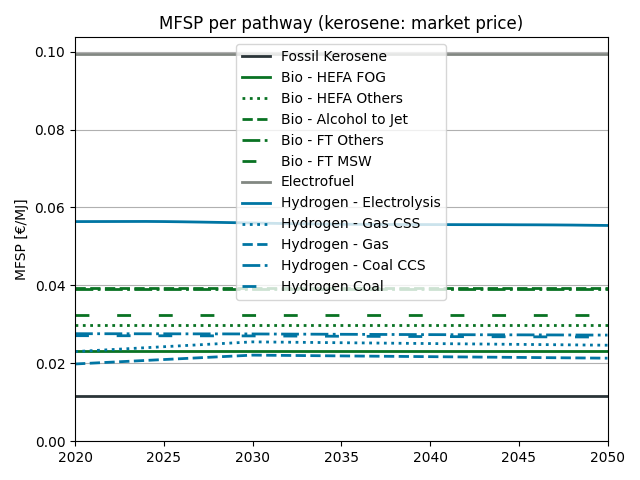

In [7]:
process.plot("energy_mfsp")

In [8]:
h2_reference = process.data["vector_outputs"][
    [
        "gas_ccs_h2_mean_mfsp_kg",
        "gas_h2_mean_mfsp_kg",
        "coal_ccs_h2_mean_mfsp_kg",
        "coal_h2_mean_mfsp_kg",
        "electrolysis_h2_mean_mfsp_kg",
        "liquefaction_h2_mean_mfsp_kg",
    ]
].loc[[2020, 2030, 2040, 2050]]
h2_reference

,gas_ccs_h2_mean_mfsp_kg,gas_h2_mean_mfsp_kg,coal_ccs_h2_mean_mfsp_kg,coal_h2_mean_mfsp_kg,electrolysis_h2_mean_mfsp_kg,liquefaction_h2_mean_mfsp_kg
2020,1.046076,0.664742,1.596797,1.535725,5.047140,1.378511
2030,1.335932,0.927900,1.579555,1.519058,4.994914,1.378511
2040,1.287622,0.884040,1.562314,1.502391,4.949078,1.378511
2050,1.239313,0.840180,1.550820,1.491280,4.924813,1.378511


In [9]:
biofuel_reference = process.data["vector_outputs"][
    [
        "biofuel_atj_mfsp",
        "biofuel_hefa_fog_mfsp",
        "biofuel_hefa_others_mfsp",
        "biofuel_ft_others_mfsp",
        "biofuel_ft_msw_mfsp",
    ]
].loc[[2020, 2030, 2040, 2050]]
biofuel_reference

,biofuel_atj_mfsp,biofuel_hefa_fog_mfsp,biofuel_hefa_others_mfsp,biofuel_ft_others_mfsp,biofuel_ft_msw_mfsp
2020,1.38668,0.815488,1.052703,1.378082,1.142423
2030,1.38668,0.815488,1.052703,1.378082,1.142423
2040,1.38668,0.815488,1.052703,1.378082,1.142423
2050,1.38668,0.815488,1.052703,1.378082,1.142423


In [10]:
efuel_reference = process.data["vector_outputs"][["electrofuel_mean_mfsp_litre"]].loc[
    [2020, 2030, 2040, 2050]
]
efuel_reference

,electrofuel_mean_mfsp_litre
2020,3.504428
2030,3.504428
2040,3.504428
2050,3.504428


The values above are used as default inputs for AeroMAPS simple cost models.   
An example of simple model is ran below.

In [11]:
models_simple = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_complex": models_energy_cost_simple,
}

process_simple = create_process(models=models_simple)

### SAme input parameters as above:

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process_simple.parameters.biofuel_share_reference_years = []
process_simple.parameters.biofuel_share_reference_years_values = [30.0]
process_simple.parameters.electrofuel_share_reference_years = []
process_simple.parameters.electrofuel_share_reference_years_values = [30.0]

process_simple.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process_simple.parameters.hydrogen_introduction_year_short_range = 2020
process_simple.parameters.fleet_renewal_duration = 20.0

# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process_simple.parameters.biofuel_hefa_fog_share_reference_years = []
process_simple.parameters.biofuel_hefa_fog_share_reference_years_values = [20]
process_simple.parameters.biofuel_hefa_others_share_reference_years = []
process_simple.parameters.biofuel_hefa_others_share_reference_years_values = [20]
process_simple.parameters.biofuel_ft_others_share_reference_years = []
process_simple.parameters.biofuel_ft_others_share_reference_years_values = [20]
process_simple.parameters.biofuel_ft_msw_share_reference_years = []
process_simple.parameters.biofuel_ft_msw_share_reference_years_values = [20]


process_simple.parameters.hydrogen_electrolysis_share_reference_years = []
process_simple.parameters.hydrogen_electrolysis_share_reference_years_values = [20]
process_simple.parameters.hydrogen_gas_ccs_share_reference_years = []
process_simple.parameters.hydrogen_gas_ccs_share_reference_years_values = [20]
process_simple.parameters.hydrogen_coal_ccs_share_reference_years = []
process_simple.parameters.hydrogen_coal_ccs_share_reference_years_values = [20]
process_simple.parameters.hydrogen_gas_share_reference_years = []
process_simple.parameters.hydrogen_gas_share_reference_years_values = [20]

process_simple.parameters.carbon_tax_reference_years = [2020, 2040]
process_simple.parameters.carbon_tax_reference_years_values = [100, 200]


### default simple callibration parameters (in parameters.json), rewritten here as an example

process_simple.parameters.biofuel_hefa_fog_mfsp_simple_reference_years = []
process_simple.parameters.biofuel_hefa_fog_mfsp_simple_reference_years_values = [0.815488]
process_simple.parameters.biofuel_hefa_others_mfsp_simple_reference_years = []
process_simple.parameters.biofuel_hefa_others_mfsp_simple_reference_years_values = [1.052703]
process_simple.parameters.biofuel_ft_others_mfsp_simple_reference_years = []
process_simple.parameters.biofuel_ft_others_mfsp_simple_reference_years_values = [1.378082]
process_simple.parameters.biofuel_ft_msw_mfsp_simple_reference_years = []
process_simple.parameters.biofuel_ft_msw_mfsp_simple_reference_years_values = [1.142423]
process_simple.parameters.biofuel_atj_mfsp_simple_reference_years = []
process_simple.parameters.biofuel_atj_mfsp_simple_reference_years_values = [1.38668]
process_simple.parameters.gh2_electrolysis_mfsp_simple_reference_years = [2020, 2030, 2040, 2050]
process_simple.parameters.gh2_electrolysis_mfsp_simple_reference_years_values = [
    5.047140,
    4.994914,
    4.949078,
    4.924813,
]
process_simple.parameters.gh2_gas_ccs_mfsp_simple_reference_years = [2020, 2030, 2040, 2050]
process_simple.parameters.gh2_gas_ccs_mfsp_simple_reference_years_values = [
    1.046076,
    1.335932,
    1.287622,
    1.239313,
]
process_simple.parameters.gh2_gas_mfsp_simple_reference_years = [2020, 2030, 2040, 2050]
process_simple.parameters.gh2_gas_mfsp_simple_reference_years_values = [
    0.664742,
    0.927900,
    0.884040,
    0.840180,
]
process_simple.parameters.gh2_coal_ccs_mfsp_simple_reference_years = [2020, 2030, 2040, 2050]
process_simple.parameters.gh2_coal_ccs_mfsp_simple_reference_years_values = [
    1.596797,
    1.579555,
    1.562314,
    1.550820,
]
process_simple.parameters.gh2_coal_mfsp_simple_reference_years = [2020, 2030, 2040, 2050]
process_simple.parameters.gh2_coal_mfsp_simple_reference_years_values = [
    1.535725,
    1.519058,
    1.502391,
    1.491280,
]
process_simple.parameters.liquefaction_mfsp_simple_reference_years = [2020, 2030, 2040, 2050]
process_simple.parameters.liquefaction_mfsp_simple_reference_years_values = [
    1.378511,
    1.378511,
    1.378511,
    1.378511,
]
process_simple.parameters.electrofuel_mfsp_simple_reference_years = []
process_simple.parameters.electrofuel_mfsp_simple_reference_years_values = [3.504428]

In [12]:
process_simple.compute()

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: carbon_tax - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


In [13]:
h2_simple = process_simple.data["vector_outputs"][
    [
        "gas_ccs_h2_mean_mfsp_kg",
        "gas_h2_mean_mfsp_kg",
        "coal_ccs_h2_mean_mfsp_kg",
        "coal_h2_mean_mfsp_kg",
        "electrolysis_h2_mean_mfsp_kg",
        "liquefaction_h2_mean_mfsp_kg",
    ]
].loc[[2020, 2030, 2040, 2050]]

In [14]:
biofuel_simple = process_simple.data["vector_outputs"][
    [
        "biofuel_atj_mfsp",
        "biofuel_hefa_fog_mfsp",
        "biofuel_hefa_others_mfsp",
        "biofuel_ft_others_mfsp",
        "biofuel_ft_msw_mfsp",
    ]
].loc[[2020, 2030, 2040, 2050]]

In [15]:
efuel_simple = process_simple.data["vector_outputs"][["electrofuel_mean_mfsp_litre"]].loc[
    [2020, 2030, 2040, 2050]
]

# Evaluation on plots

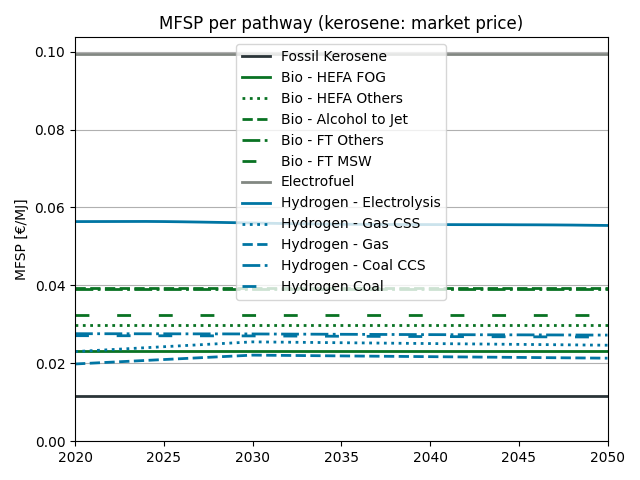

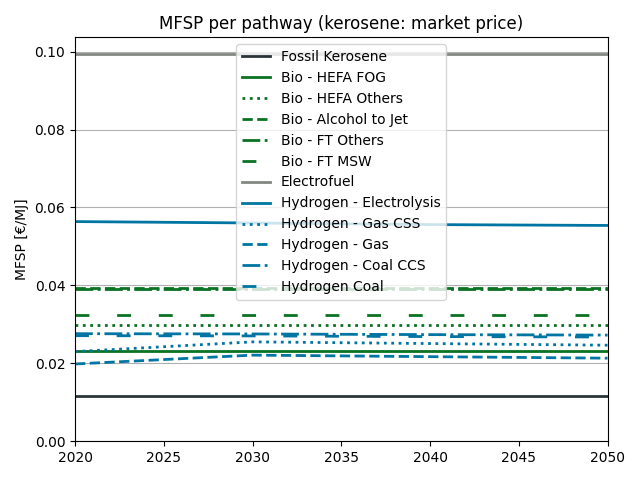

In [16]:
process.plot("energy_mfsp")
process_simple.plot("energy_mfsp")

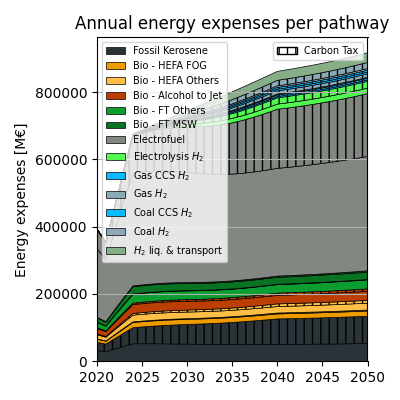

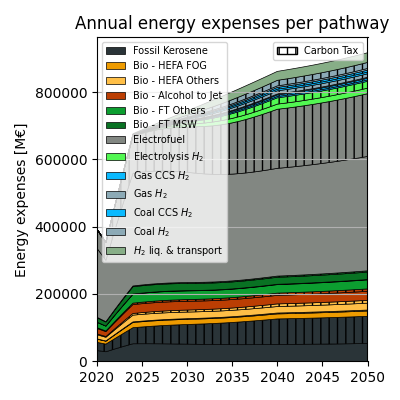

In [17]:
process_simple.plot("energy_expenses_with_carbon_tax")
process.plot("energy_expenses_with_carbon_tax")

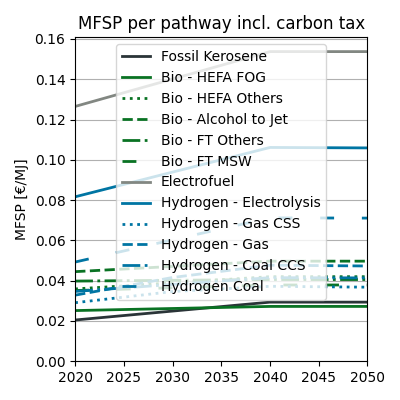

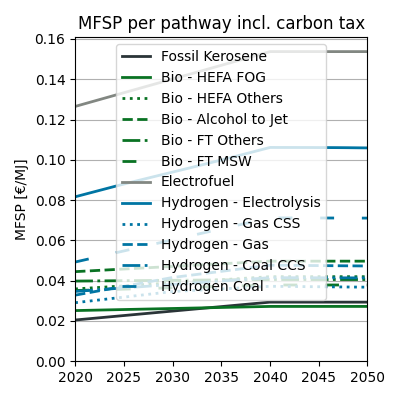

In [18]:
process_simple.plot("energy_mfsp_with_carbon_tax")
process.plot("energy_mfsp_with_carbon_tax")